<a href="https://colab.research.google.com/github/yagamiAbhi/Black-Friday-Sales-Prediction-and-Prediction/blob/main/Black_Friday_Sales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Black Friday Sales Prediction
This dataset comprises of sales transactions captured at a retail store. It’s a classic dataset to explore and expand your feature engineering skills and day to day understanding from multiple shopping experiences. This is a regression problem. The dataset has 550,069 rows and 12 columns.

**Problem:Predict purchase amount**.

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [58]:
df = pd.read_csv('/content/BlackFridaySales.csv')
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


Feature Engineering
==========

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [60]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

**Observation:** Three columns contains null values

In [61]:
df.nunique()

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               20
Product_Category_2               17
Product_Category_3               15
Purchase                      18105
dtype: int64

**Observation:** Number of unique records in each columns

In [62]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


## Filling Null Value

In [63]:
df['Product_Category_2'].fillna(int(df['Product_Category_2'].median()), inplace = True)

In [64]:
df['Product_Category_3'].fillna(int(df['Product_Category_2'].median()), inplace = True)

In [65]:
df[df['Purchase'].isnull()]

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase


In [66]:
df.dropna(subset=['Purchase'],inplace=True)

In [67]:
df.isna().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

### Data Visualisation

array([[<Axes: title={'center': 'User_ID'}>,
        <Axes: title={'center': 'Occupation'}>,
        <Axes: title={'center': 'Marital_Status'}>],
       [<Axes: title={'center': 'Product_Category_1'}>,
        <Axes: title={'center': 'Product_Category_2'}>,
        <Axes: title={'center': 'Product_Category_3'}>],
       [<Axes: title={'center': 'Purchase'}>, <Axes: >, <Axes: >]],
      dtype=object)

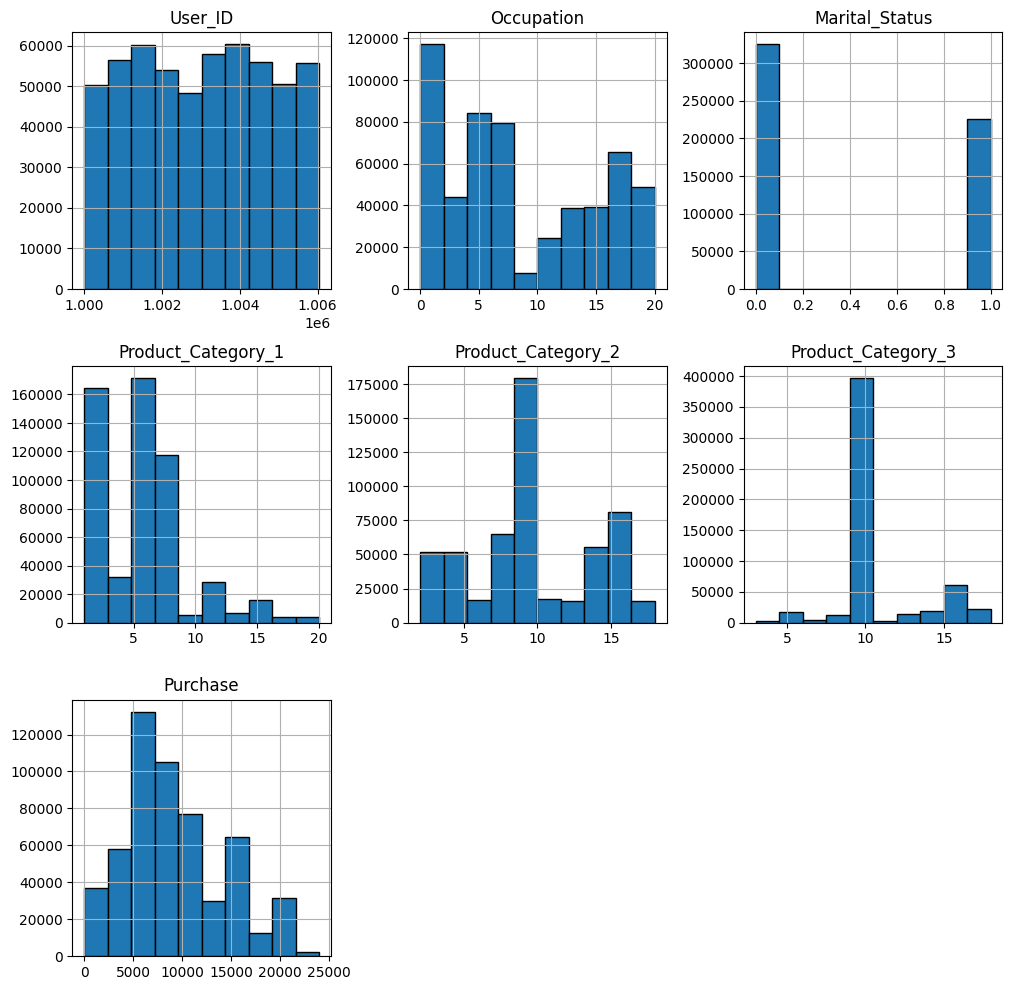

In [68]:
df.hist(edgecolor='black',figsize=(12,12))



1.   **Gender**


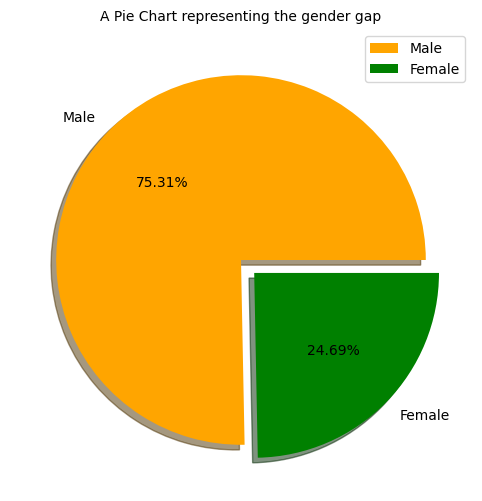

In [69]:
size = df['Gender'].value_counts()
labels = ['Male', 'Female']
colors = ['orange', 'green']
explode = [0, 0.1]
plt.pie(size, colors = colors, labels = labels, shadow = True, explode = explode, autopct = '%.2f%%')
plt.title('A Pie Chart representing the gender gap', fontsize = 10)
plt.legend()
plt.show()

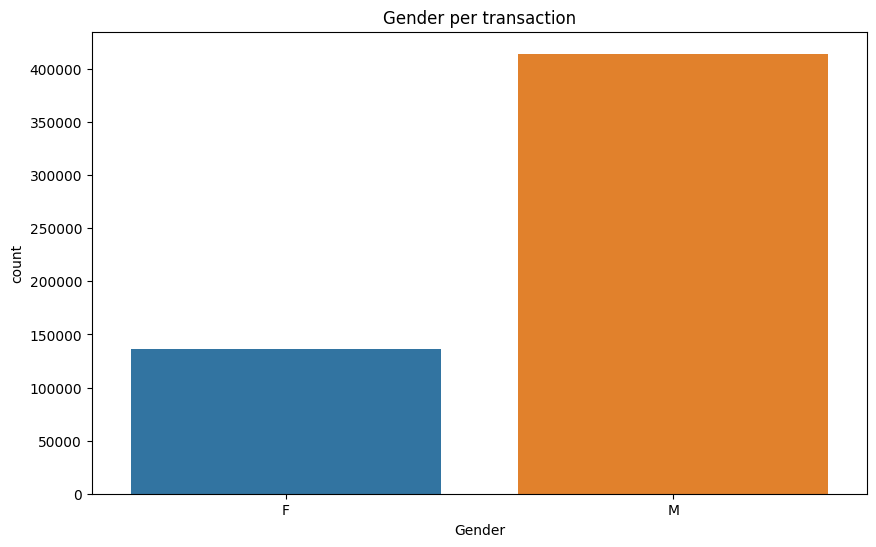

In [70]:
sns.countplot(x=df.Gender)
plt.title('Gender per transaction');



2.   **Age**


In [71]:
dfByage = df.groupby(by='Age').count()[['Purchase']]

In [72]:
dfByage.reset_index(inplace=True)

In [73]:
dfByage.rename(columns={'Purchase':'No. Transaction by Age'},inplace=True)

<Axes: xlabel='Age', ylabel='No. Transaction by Age'>

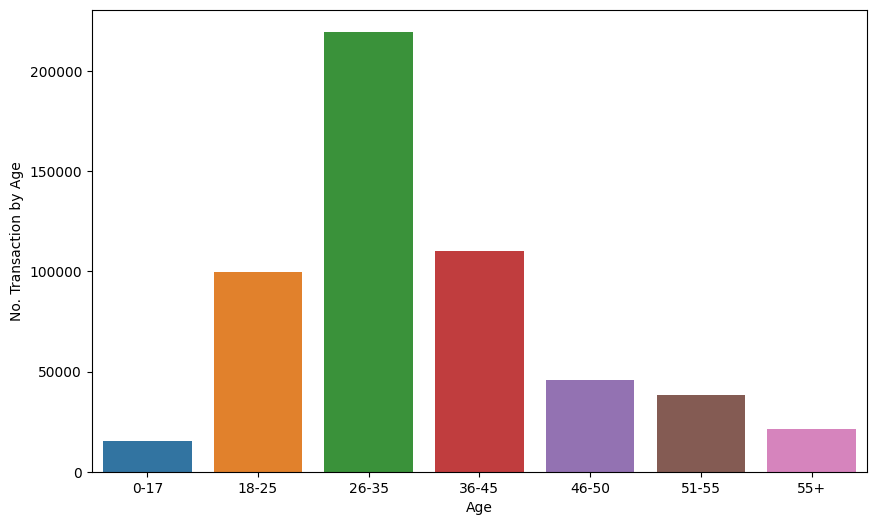

In [74]:
#dfByage
sns.barplot( x='Age', y='No. Transaction by Age',data=dfByage)

**Observation:** The Most Transactions has been made by the age group of 26-35



3.   **Occupation of customers**


*Number Transaction by Occupation*

<Axes: xlabel='Occupation', ylabel='No. Transaction by Occupation'>

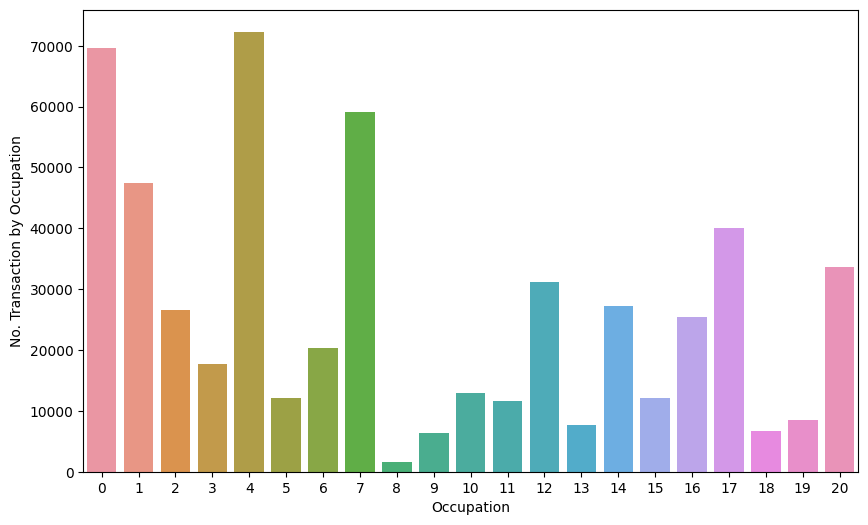

In [75]:
dfByoccupation = df.groupby(by='Occupation').count()[['Purchase']]
dfByoccupation.reset_index(inplace=True)
dfByoccupation.rename(columns={'Purchase':'No. Transaction by Occupation'},inplace=True)
#dfByage
sns.barplot( x='Occupation', y='No. Transaction by Occupation',data=dfByoccupation)

*Total Money spent per occupation*

<Axes: xlabel='Occupation', ylabel='Total Money spent per occupation'>

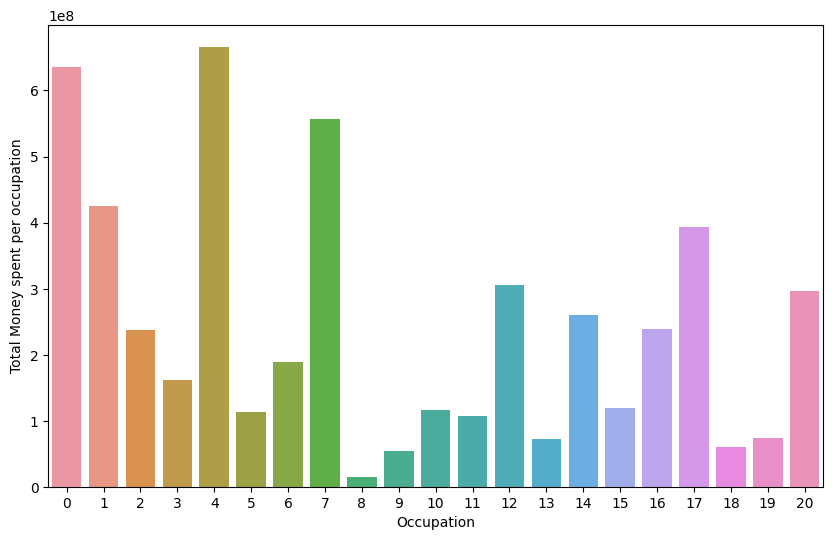

In [76]:
dfByoccupation1 = df.groupby(by='Occupation').sum()[['Purchase']]
dfByoccupation1.reset_index(inplace=True)
dfByoccupation1.rename(columns={'Purchase':'Total Money spent per occupation'},inplace=True)
sns.barplot( x='Occupation', y='Total Money spent per occupation',data=dfByoccupation1)

**Observation:** The Most Transactions has been made by customesrs with occupation 4 and then followed by 0,7,1 and so on... and same is with the total money spent.

4.   **Marital Status**

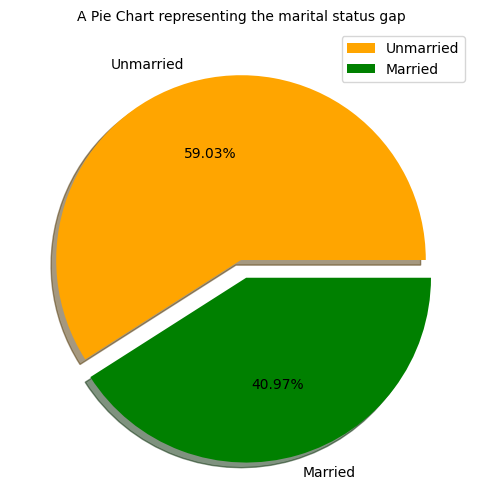

In [77]:
size = df['Marital_Status'].value_counts()
labels = ['Unmarried', 'Married']
colors = ['orange', 'green']
explode = [0, 0.1]
plt.pie(size, colors = colors, labels = labels, shadow = True, explode = explode, autopct = '%.2f%%')
plt.title('A Pie Chart representing the marital status gap', fontsize = 10)
plt.legend()
plt.show()

5.   **City Category**

<Axes: xlabel='City_Category', ylabel='No. Transaction by City'>

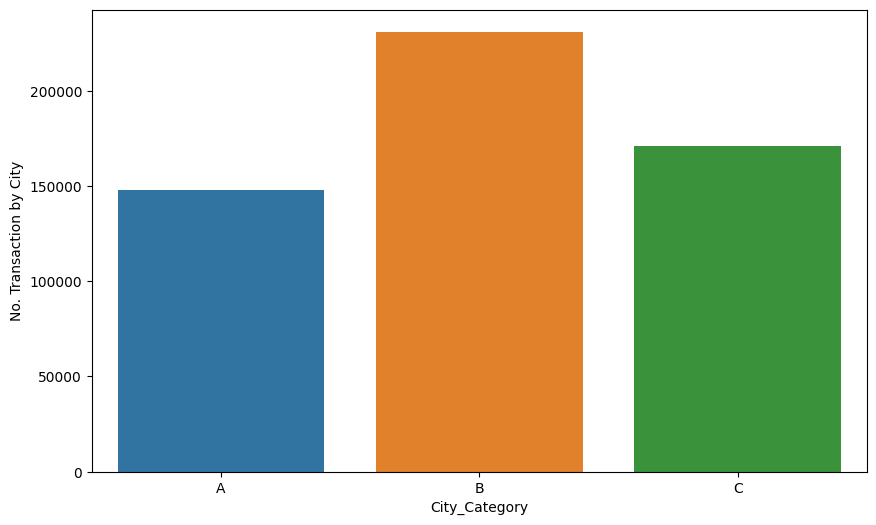

In [78]:
dfBycity = df.groupby(by='City_Category').count()[['Purchase']]
dfBycity.reset_index(inplace=True)
dfBycity.rename(columns={'Purchase':'No. Transaction by City'},inplace=True)
sns.barplot( x='City_Category', y='No. Transaction by City',data=dfBycity)

**Observation:** The Most Transactions has been made by customesrs Living in City category B.

6.   **Products**

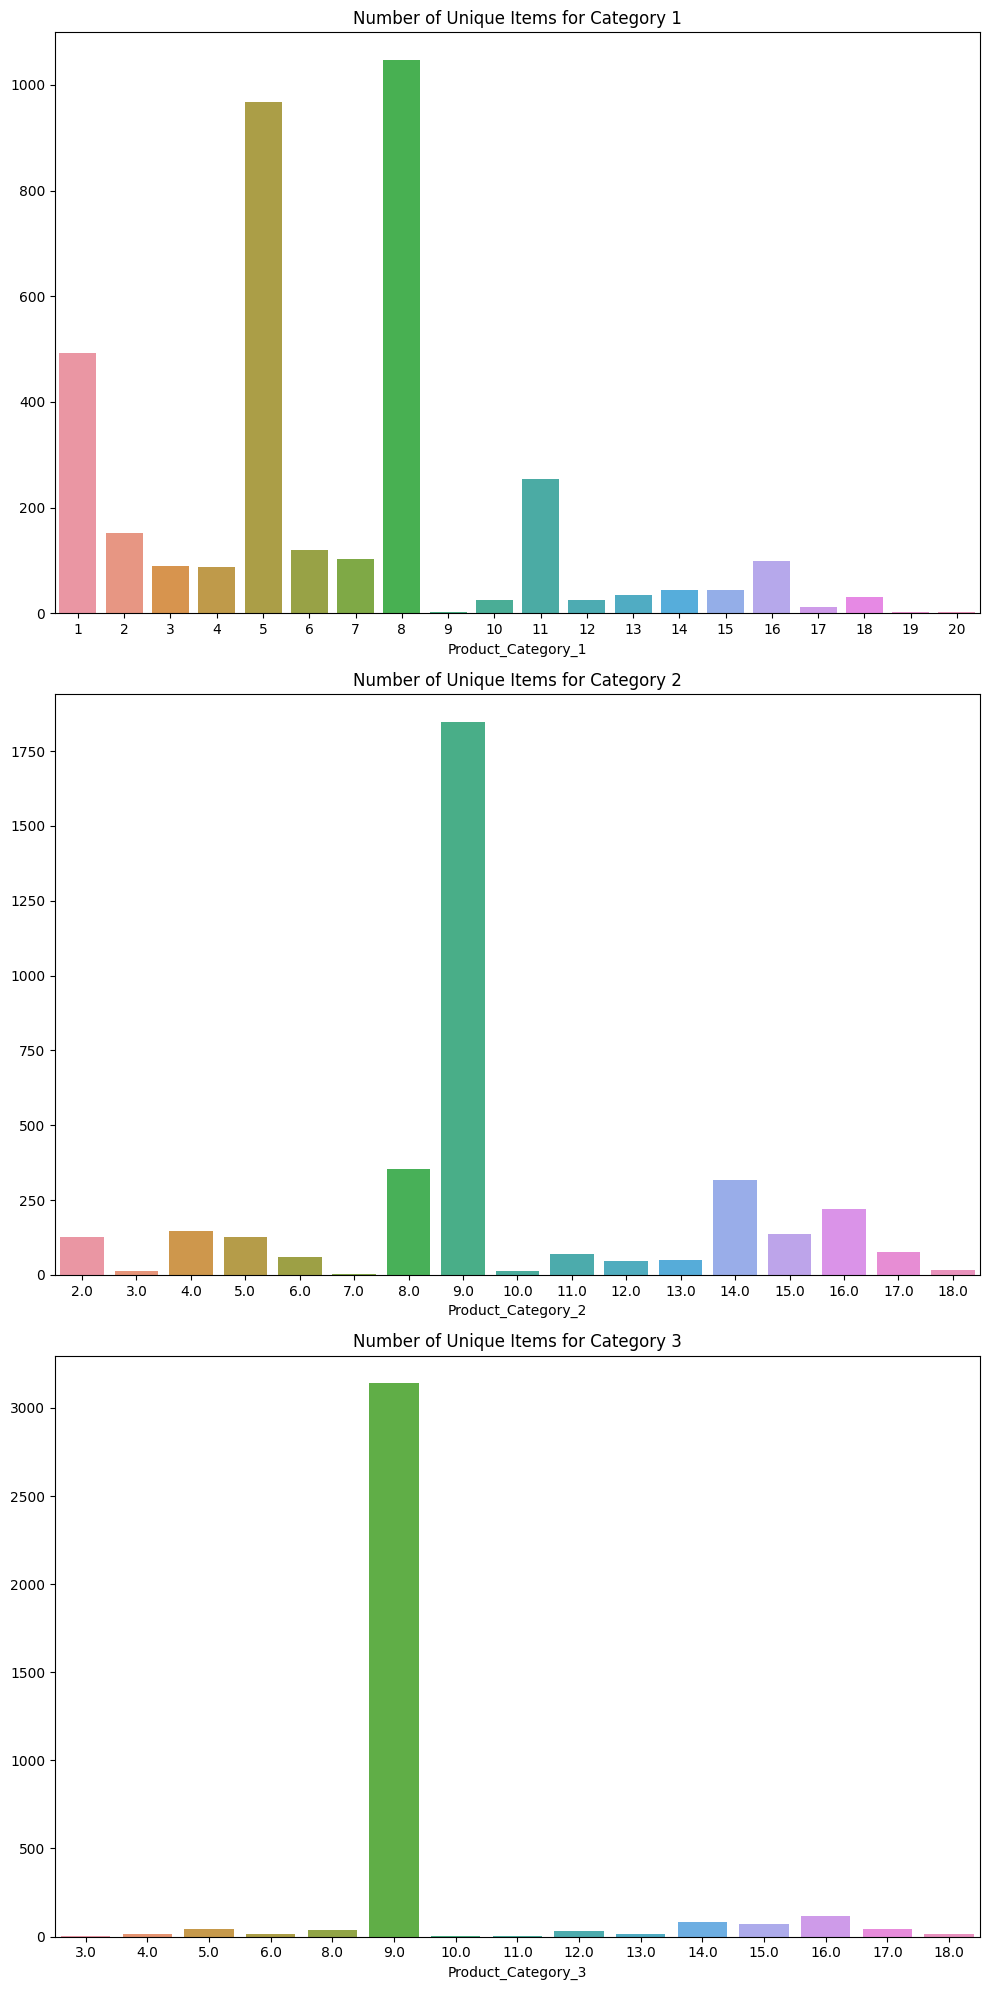

In [79]:
plt.figure(figsize=(10,20))
plt.subplot(3, 1, 1)
prod_by_cat = df.groupby(by='Product_Category_1')['Product_ID'].nunique()
sns.barplot(x=prod_by_cat.index, y=prod_by_cat.values)
plt.title('Number of Unique Items for Category 1')

plt.subplot(3, 1, 2)
prod_by_cat = df.groupby(by='Product_Category_2')['Product_ID'].nunique()
sns.barplot(x=prod_by_cat.index, y=prod_by_cat.values)
plt.title('Number of Unique Items for Category 2')

plt.subplot(3, 1, 3)
prod_by_cat = df.groupby(by='Product_Category_3')['Product_ID'].nunique()
sns.barplot(x=prod_by_cat.index, y=prod_by_cat.values)
plt.title('Number of Unique Items for Category 3')

plt.tight_layout()
plt.show()

**Observation:**

1.   Product label 8 and 5 are in the most quantity within category 1.
2.   Product label 9 are in the most quantity within category 2 and 3.

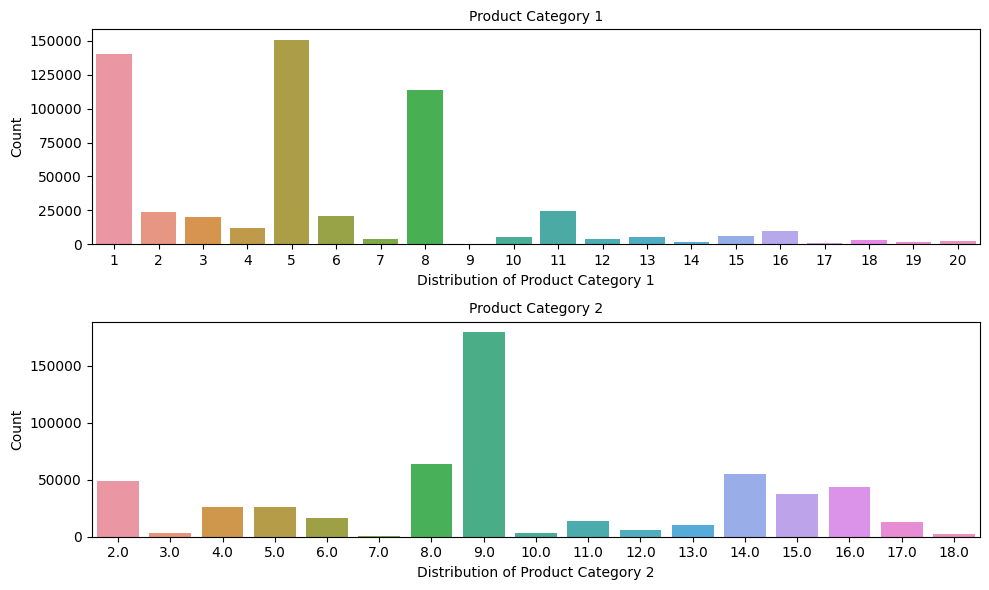

In [80]:
plt.rcParams['figure.figsize'] = (10, 6)
pg1 = df.groupby(by='Product_Category_1').count()['Purchase']
pg2 = df.groupby(by='Product_Category_2').count()['Purchase']

plt.subplot(2, 1, 1)
sns.barplot(x=pg1.index, y=pg1.values)
plt.title('Product Category 1', fontsize = 10)
plt.xlabel('Distribution of Product Category 1')
plt.ylabel('Count')

plt.subplot(2, 1, 2)
sns.barplot(x=pg2.index, y=pg2.values)
plt.title('Product Category 2', fontsize = 10)
plt.xlabel('Distribution of Product Category 2')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

## Encoding

In [81]:
to_lable_encode = ['Age','Stay_In_Current_City_Years']

In [82]:
from sklearn.preprocessing import LabelEncoder

In [83]:
le = LabelEncoder()

In [84]:
for col in to_lable_encode:
    df[col+'_encoded'] = le.fit_transform(df[col])

In [86]:
to_dummies = ['Gender', 'City_Category']

In [87]:
df = pd.get_dummies(data=df, columns = to_dummies)

In [88]:
df.columns

Index(['User_ID', 'Product_ID', 'Age', 'Occupation',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase', 'Age_encoded',
       'Stay_In_Current_City_Years_encoded', 'Gender_F', 'Gender_M',
       'City_Category_A', 'City_Category_B', 'City_Category_C'],
      dtype='object')

Data Split
=============

In [105]:
x = df[['Occupation','Marital_Status', 'Product_Category_1','Product_Category_2', 'Product_Category_3','Age_encoded',
       'Stay_In_Current_City_Years_encoded', 'Gender_F', 'Gender_M','City_Category_A', 'City_Category_B', 'City_Category_C']]
y = df['Purchase']

In [106]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=100)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(440054, 12)
(440054,)
(110014, 12)
(110014,)


## **Modelling**

## Linear Regression

In [107]:
from sklearn.linear_model import LinearRegression

In [108]:
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [102]:
#Purchase_predicted = lr.predict(x_test)

In [109]:
print("Train Score : ", lr.score(x_train,y_train))
print("Test Score : ", lr.score(x_test,y_test))

Train Score :  0.13908519808917486
Test Score :  0.14087221600868638


In [110]:
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score

In [140]:
Model_Accuracy=[]
Mean_Squared_Error=[]
Mean_Absolute_Error=[]
RMSE=[]
class_model=[]

def res(model,y_actual,y_predicted):
    print('Mean Squared Error  = ', mean_squared_error(y_actual,y_predicted))
    print('Mean Absolute Error = ', mean_absolute_error(y_actual,y_predicted))
    print('Model Accuracy      = ', r2_score(y_actual,y_predicted))
    print('RMSE                = ', np.sqrt(mean_squared_error(y_actual,y_predicted)))
    Model_Accuracy.append(r2_score(y_actual,y_predicted))
    Mean_Squared_Error.append(mean_squared_error(y_actual,y_predicted))
    Mean_Absolute_Error.append(mean_absolute_error(y_actual,y_predicted))
    RMSE.append(np.sqrt(mean_squared_error(y_actual,y_predicted)))
    class_model.append(model)


In [112]:
yp = lr.predict(x_test)

In [141]:
res('LR',y_test,yp)

Mean Squared Error  =  21683868.673922595
Mean Absolute Error =  3569.574789925925
Model Accuracy      =  0.14087221600868638
RMSE                =  4656.594106632292


DTRegressor
===============

In [114]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor(random_state = 0)

In [115]:
dtr.fit(x_train,y_train)

DecisionTreeRegressor(random_state=0)

In [116]:
y_dtr = dtr.predict(x_test)

In [142]:
res('DTR',y_test,y_dtr)

Mean Squared Error  =  10975982.053622883
Mean Absolute Error =  2341.322868823602
Model Accuracy      =  0.5651250576794968
RMSE                =  3313.0019700602174


Random Forest Regressor
=====

In [118]:
from sklearn.ensemble import RandomForestRegressor

# create a regressor object
RFR = RandomForestRegressor(random_state = 0)

In [119]:
RFR.fit(x_train,y_train)

RandomForestRegressor(random_state=0)

In [125]:
y_rfr = RFR.predict(x_test)

In [143]:
res('RFR',y_test,y_rfr)

Mean Squared Error  =  9285376.189839467
Mean Absolute Error =  2212.9681740553706
Model Accuracy      =  0.6321078683207411
RMSE                =  3047.1915249684366


### **Comparion among different Regression models**

In [144]:
result_df=pd.DataFrame({'Model Accuracy':Model_Accuracy, 'Mean Squared Error':Mean_Squared_Error,
                        'Mean Absolute Error':Mean_Absolute_Error, 'RMSE':RMSE},index=class_model)
result_df

,Model Accuracy,Mean Squared Error,Mean Absolute Error,RMSE
LR,0.140872,2.168387e+07,3569.574790,4656.594107
DTR,0.565125,1.097598e+07,2341.322869,3313.001970
RFR,0.632108,9.285376e+06,2212.968174,3047.191525
